In [66]:
import numpy as np
from PIL import Image
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt
from helper import hist

In [67]:
img = Image.open('img_in/museums-victoria-QF1v2yyUi4E-unsplash.jpg').convert('L')
img_pxs = np.array(img)
img_pxs.shape

(513, 640)

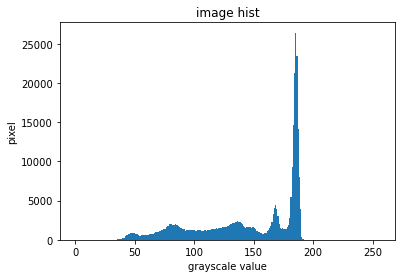

In [68]:
hist(img_pxs, x='grayscale value', y='pixel')

Исходное изображение

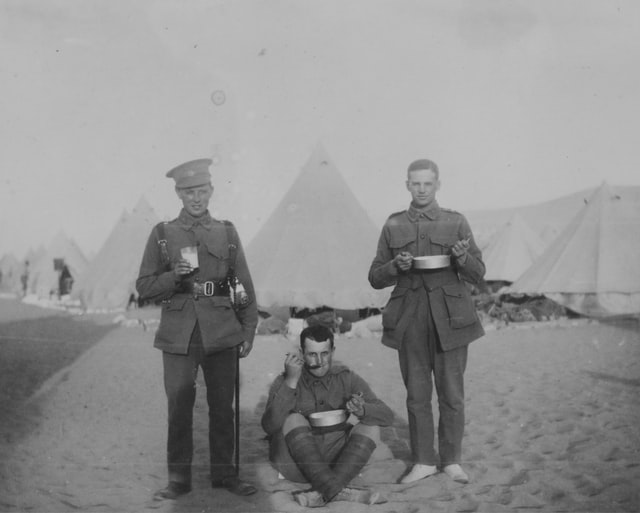

In [69]:
img

In [70]:
def thresholdPreprocessing(img: Image.Image)->Image.Image:
    img = np.array(img)
    med = np.mean(img)*0.92
    output_arr = np.where(img<=med, 0, 255)
    output_img = Image.fromarray(np.uint8(output_arr))
    return output_img

In [7]:
# def thresholdEachChannel(img: Image.Image)->Image.Image:
#     red, green, blue = img.split()
#     red, green, blue = list(map(np.array, [red, green, blue]))
#     meanred = np.quantile(np.array(red), q=0.35)
#     meangreen= np.quantile(np.array(green), q=0.35)
#     meanblue= np.quantile(np.array(blue), q=0.35)
#     outputred = np.where(red <= meanred,0,255)
#     outputgreen= np.where(green <= meangreen,0,255)
#     outputblue= np.where(blue <= meanblue,0,255)
#     merged_chan = np.dstack((outputred, outputgreen, outputblue))
#     output_img = Image.fromarray(np.uint8(merged_chan))
#     return output_img

In [49]:
# outputTEC = thresholdEachChannel(img)
# outputTEC.convert('1')

ValueError: not enough values to unpack (expected 3, got 1)

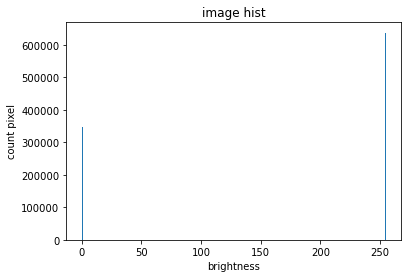

In [9]:
# histPlotImage(outputTEC)

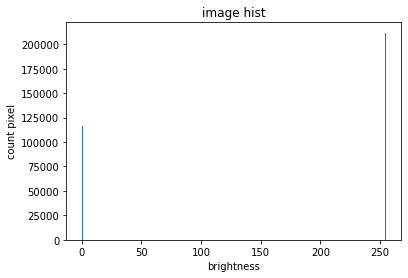

In [71]:
threshold_img = thresholdPreprocessing(img)
histPlotImage(threshold_img)

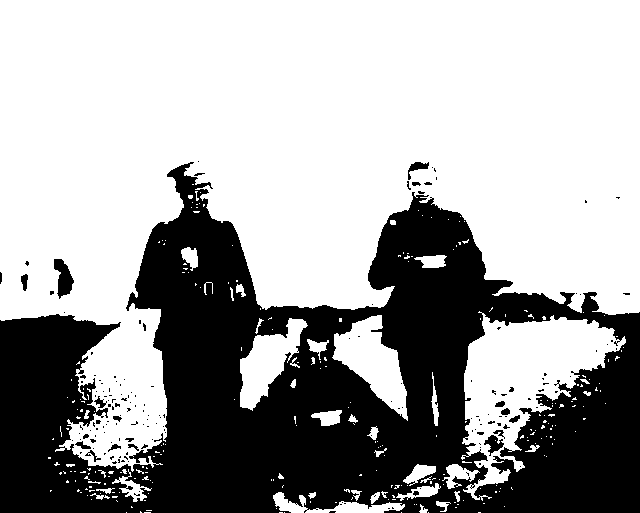

In [72]:
threshold_img

In [12]:
def thresholdValue(img: Image.Image)->tuple:
    """ 
    The function returns threshold values for each channel 
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return tuple(list, list)
    """
    red, green, blue = img.split()
    arrays_chan = list(map(np.array, [red, green, blue]))
    minchan = list(map(np.min, arrays_chan))
    maxchan = list(map(np.max, arrays_chan))
    return minchan, maxchan

In [84]:
def linearContrast(img: np.ndarray):
    """
    The function is implemented linear contrasting for RGB channels in the image. 
    It normalizes each image channel
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return PIL.Image.Image
    """
    Y_min, Y_max = 0, 255
    width = img.shape[1]
    height = img.shape[0]
    img_flatten = img_pxs.flatten()
    X_min = min(img_flatten)
    X_max = max(img_flatten)
    a = (Y_max - Y_min)/(X_max - X_min)
    b = (Y_min*X_max - Y_max*X_min)/(X_max - X_min)
    for i in range(height):
        for j in range(width):
            img[i,j] = a*img[i,j] + b

    return img

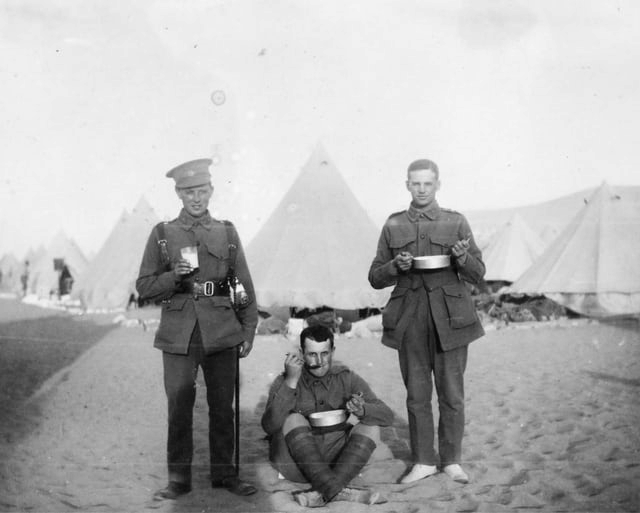

In [87]:
output_img = linearContrast(img_pxs)
# output_img.save('img_out/output_soldier.jpg')
Image.fromarray(output_img)

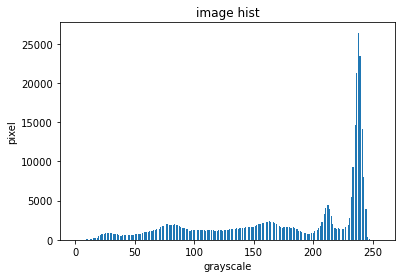

<Figure size 432x288 with 0 Axes>

In [90]:
hist(output_img, x='grayscale', y='pixel')
plt.savefig('img_out/output-img-hist.png', dpi=300)

In [16]:
# preparing_img = Image.fromarray(np.array(output_img)//4+100)
# preparing_img.save('img_out/preparing_soldier.jpg')

In [17]:
# histPlotImage(preparing_img)

In [93]:
def preparingImg(img: Image.Image)->Image.Image:
    img = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.isin(img[i,j],np.arange(100,150,1)).any():
                img[i,j] = 255
            else:
                img[i,j] = 0
#     red, green, blue = img.split()
#     red, green, blue = list(map(np.array, [red, green, blue]))
#     output_red = np.where(np.isin(red, np.arange(100,150,1)), 255, 0)
#     output_green = np.where(np.isin(green, np.arange(100,150,1)), 255, 0)
#     output_blue = np.where(np.isin(blue, np.arange(100,150,1)), 255, 0)
#     arr_output = np.uint8(np.dstack((output_red, output_green, output_blue)))
    output_img = Image.fromarray(img)
    return output_img

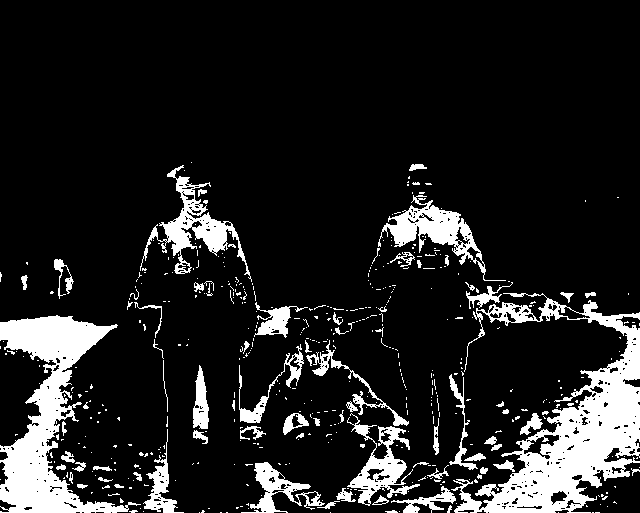

In [94]:
prep_soldeir = preparingImg(output_img)
prep_soldeir.save('preparing_soldir_v2.jpg')
prep_soldeir

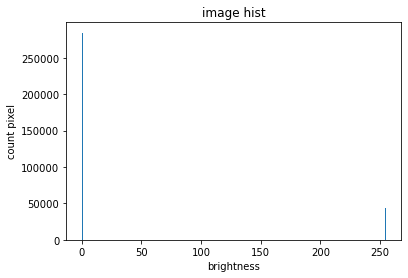

In [95]:
histPlotImage(prep_soldeir)

In [21]:
x = np.linspace(0, 256, dtype=int)
y = np.zeros(len(x))
for i in range(0, len(x)):
    if x[i] in range(100,150):
        y[i] = 255
    else:
        y[i] = 0

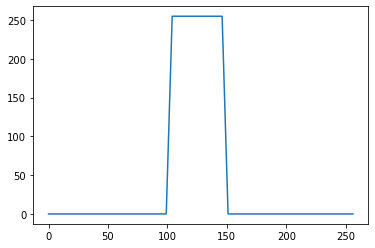

In [22]:
plt.plot(x, y)